## Analyze Permutation Importance

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [2]:
LEADS = np.arange(7,31)
AVGS = np.arange(2,32)
SEEDS = np.arange(1,6)
SHUFFLE = 'MJOENSO'

### Load Data

In [3]:
# Orginial Confidence vs Accuracy
confvsacc_all = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS),100))

for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        # print('AVG: '+str(avg))
        ddir_load = '/glade/derecho/scratch/kjmayer/DATA/ENSOvsMJO/data/'

        finame_confvsacc = 'confvsacc_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        confvsacc_all[l,a] = np.load(ddir_load+finame_confvsacc)

confvsacc_all = np.mean(confvsacc_all,axis=2)

LEAD: 7
LEAD: 8
LEAD: 9
LEAD: 10
LEAD: 11
LEAD: 12
LEAD: 13
LEAD: 14
LEAD: 15
LEAD: 16
LEAD: 17
LEAD: 18
LEAD: 19
LEAD: 20
LEAD: 21
LEAD: 22
LEAD: 23
LEAD: 24
LEAD: 25
LEAD: 26
LEAD: 27
LEAD: 28
LEAD: 29
LEAD: 30


In [4]:
# Permutation Importance Results
confvsacc_all_pi = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS),100))

for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        # print('AVG: '+str(avg))
        ddir_load = '/glade/derecho/scratch/kjmayer/DATA/ENSOvsMJO/data/'
        
        if SHUFFLE != 'MJO':
            finame_confvsacc = 'confvsacc_permutimport-'+SHUFFLE+'_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        elif SHUFFLE == 'MJO':
            finame_confvsacc = 'confvsacc_permutimport_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        confvsacc_all_pi[l,a] = np.load(ddir_load+finame_confvsacc)

confvsacc_all_pi = np.mean(confvsacc_all_pi,axis=2)

LEAD: 7
LEAD: 8
LEAD: 9
LEAD: 10
LEAD: 11
LEAD: 12
LEAD: 13
LEAD: 14
LEAD: 15
LEAD: 16
LEAD: 17
LEAD: 18
LEAD: 19
LEAD: 20
LEAD: 21
LEAD: 22
LEAD: 23
LEAD: 24
LEAD: 25
LEAD: 26
LEAD: 27
LEAD: 28
LEAD: 29
LEAD: 30


In [5]:
## Difference:
confvsacc_all_diff = confvsacc_all_pi - confvsacc_all

### Plot Data

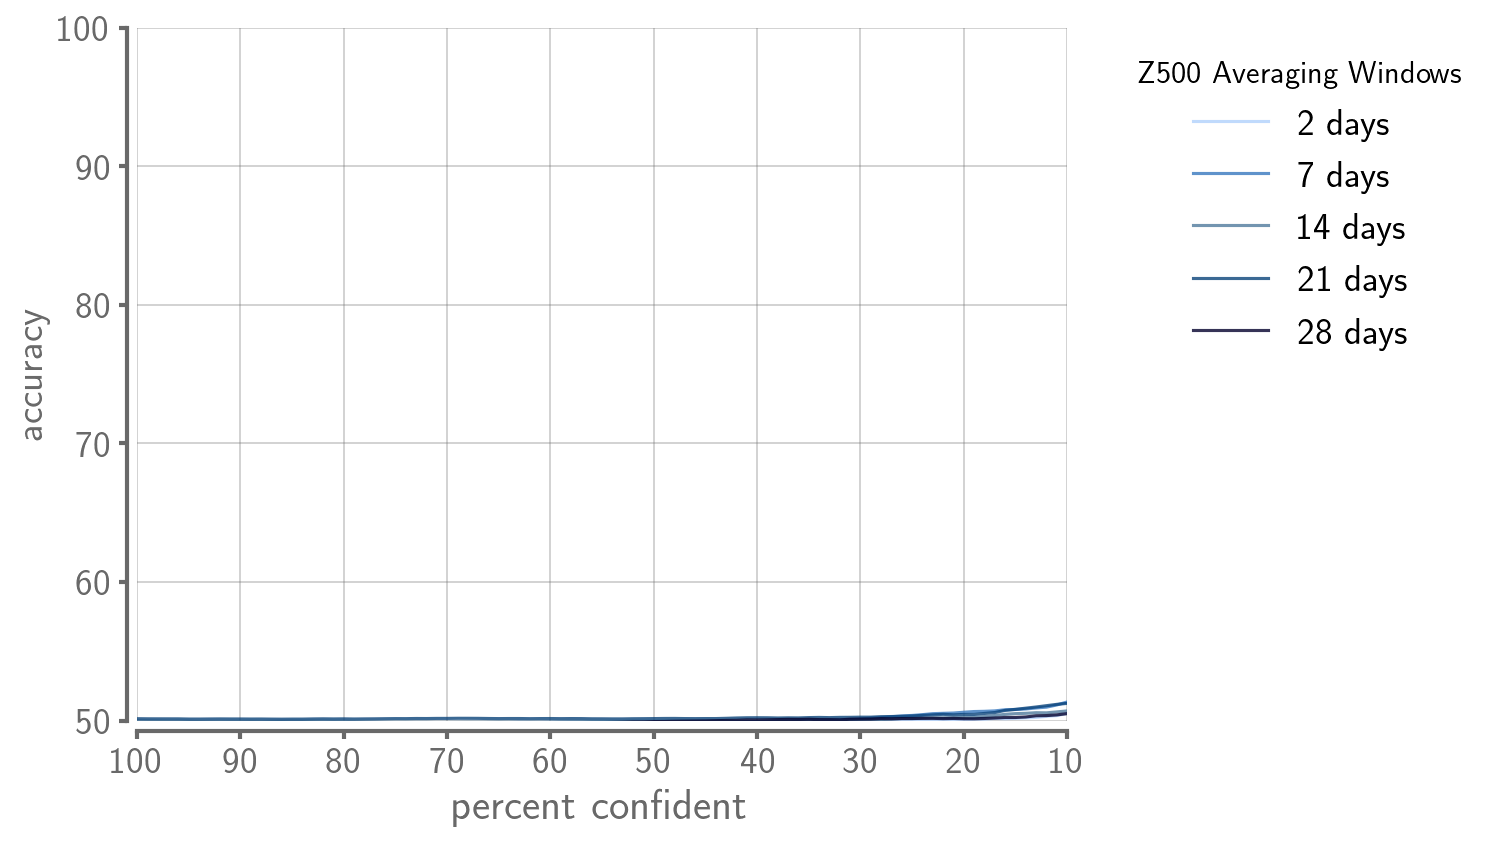

In [6]:
FS = 18
plt.figure(figsize=(8, 6))

ax = plt.subplot(1,1,1)
adjust_spines(ax, ['left', 'bottom'])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')
ax.yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
ax.xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

plt.plot(np.mean(confvsacc_all_pi[:,0],axis=0),'xkcd:powder blue',alpha=0.8,label='2 days')
# plt.fill_between(x = np.arange(0,100),
#                  y1 = np.min(confvsacc_all_pi[:,0],axis=0),
#                  y2 = np.max(confvsacc_all_pi[:,0],axis=0),color='k',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all_pi[:,5],axis=0),'xkcd:windows blue',alpha=0.8,label='7 days')
# plt.fill_between(x = np.arange(0,100),
#                  y1 = np.min(confvsacc_all_pi[:,7],axis=0),
#                  y2 = np.max(confvsacc_all_pi[:,7],axis=0),color='grey',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all_pi[:,12],axis=0),'xkcd:stormy blue',alpha=0.8,label='14 days')
# plt.fill_between(x = np.arange(0,100),
#                  y1 = np.min(confvsacc_all_pi[:,14],axis=0),
#                  y2 = np.max(confvsacc_all_pi[:,14],axis=0),color='xkcd:steel blue',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all_pi[:,19],axis=0),'xkcd:twilight blue',alpha=0.8,label='21 days')
# plt.fill_between(x = np.arange(0,100),
#                  y1 = np.min(confvsacc_all_pi[:,21],axis=0),
#                  y2 = np.max(confvsacc_all_pi[:,21],axis=0),color='xkcd:light blue',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all_pi[:,26],axis=0),'xkcd:midnight',alpha=0.8,label='28 days')
# plt.fill_between(x = np.arange(0,100),
#                  y1 = np.min(confvsacc_all_pi[:,21],axis=0),
#                  y2 = np.max(confvsacc_all_pi[:,21],axis=0),color='xkcd:light blue',alpha=0.2,linewidth=0)

plt.ylim(50,100)
plt.yticks(np.arange(50,110,10),np.arange(50,110,10),fontsize=FS,color='dimgrey')
plt.ylabel('accuracy',fontsize=FS+1,color='dimgrey')
plt.xlim(0,90)
plt.xticks(np.arange(0,100,10),np.arange(10,110,10)[::-1],fontsize=FS,color='dimgrey')
plt.xlabel('percent confident',fontsize=FS+3,color='dimgrey')
plt.legend(frameon=False, fontsize=FS,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left", title='Z500 Averaging Windows')

plt.show()

### Plot Difference (Permutation - Original)

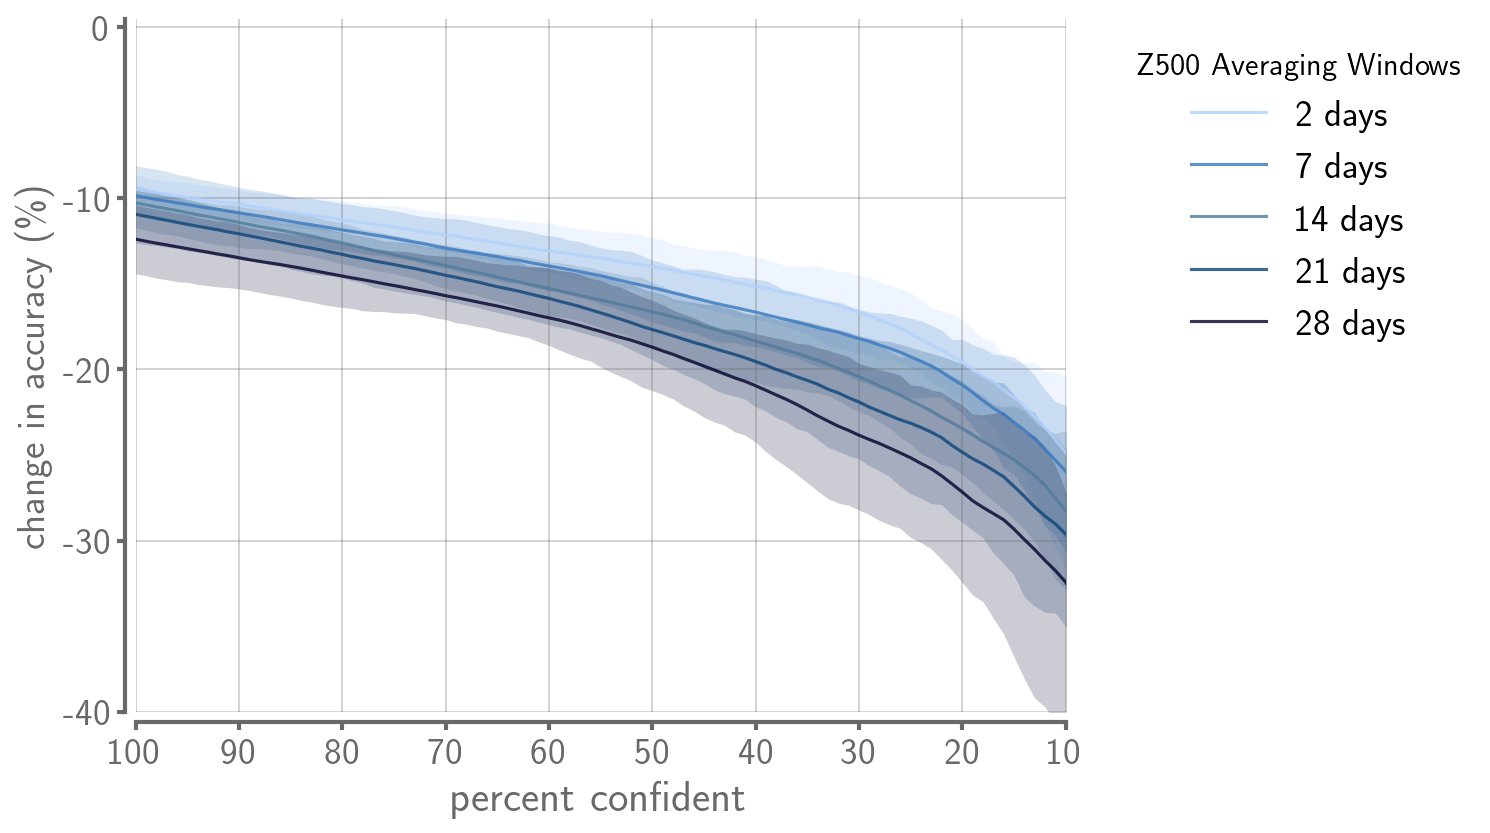

In [7]:
FS = 18
plt.figure(figsize=(8, 6))

ax = plt.subplot(1,1,1)
adjust_spines(ax, ['left', 'bottom'])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')
ax.yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
ax.xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

plt.plot(np.mean(confvsacc_all_diff[:,0],axis=0),'xkcd:powder blue',alpha=0.8,label='2 days')
plt.fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all_diff[:,0],axis=0),
                 y2 = np.max(confvsacc_all_diff[:,0],axis=0),color='xkcd:powder blue',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all_diff[:,5],axis=0),'xkcd:windows blue',alpha=0.8,label='7 days')
plt.fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all_diff[:,5],axis=0),
                 y2 = np.max(confvsacc_all_diff[:,5],axis=0),color='xkcd:windows blue',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all_diff[:,12],axis=0),'xkcd:stormy blue',alpha=0.8,label='14 days')
plt.fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all_diff[:,12],axis=0),
                 y2 = np.max(confvsacc_all_diff[:,12],axis=0),color='xkcd:stormy blue',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all_diff[:,19],axis=0),'xkcd:twilight blue',alpha=0.8,label='21 days')
plt.fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all_diff[:,19],axis=0),
                 y2 = np.max(confvsacc_all_diff[:,19],axis=0),color='xkcd:twilight blue',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all_diff[:,26],axis=0),'xkcd:midnight',alpha=0.8,label='28 days')
plt.fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all_diff[:,26],axis=0),
                 y2 = np.max(confvsacc_all_diff[:,26],axis=0),color='xkcd:midnight',alpha=0.2,linewidth=0)

# plt.ylim(-10,0.5)
# plt.yticks(np.arange(-10,2,2),np.arange(-10,2,2),fontsize=FS,color='dimgrey')
plt.ylim(-40,0.5)
plt.yticks(np.arange(-40,10,10),np.arange(-40,10,10),fontsize=FS,color='dimgrey')
plt.ylabel('change in accuracy (\%)',fontsize=FS+1,color='dimgrey')
plt.xlim(0,90)
plt.xticks(np.arange(0,100,10),np.arange(10,110,10)[::-1],fontsize=FS,color='dimgrey')
plt.xlabel('percent confident',fontsize=FS+3,color='dimgrey')
plt.legend(frameon=False, fontsize=FS,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left", title='Z500 Averaging Windows')

plt.savefig('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/plots/ENSOpermutimport_main.png',dpi=300,bbox_inches='tight')
# plt.show()